# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [1]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

In [2]:
# Additional imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import sqlite3

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

import statsmodels.formula.api as smf

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [3]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1591k      0 --:--:-- --:--:-- --:--:-- 1591k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [4]:
query = '''
    SELECT 
        c.*, 
        COUNT(r.category) + 1 AS family_size, 
        p.category AS profession, 
        SUM(e.duration) AS work_experience
    FROM customers AS c
    LEFT JOIN relatives AS r ON c.id = r.customer_id
    LEFT JOIN experiences AS e ON c.id = e.customer_id
    LEFT JOIN professions AS p ON e.profession_id = p.id
    GROUP BY c.id
'''

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [5]:
connector = sqlite3.connect('db/customers.sqlite')

data = pd.read_sql_query(query, connector).set_index('id')

print("Shape of the DataFrame:", data.shape)

data.head(10)

Shape of the DataFrame: (8068, 9)


,gender,married,graduated,age,score,segment,family_size,profession,work_experience
id,,,,,,,,,
1,Male,No,No,22,Low,D,4,Healthcare,3.0
2,Female,Yes,Yes,38,Average,A,3,Engineer,NaN
3,Female,Yes,Yes,67,Low,B,1,Engineer,1.0
4,Male,Yes,Yes,67,High,B,2,Lawyer,0.0
5,Female,Yes,Yes,40,High,A,6,Entertainment,NaN
6,Male,Yes,No,56,Average,C,2,Artist,0.0
7,Male,No,Yes,32,Low,C,3,Healthcare,2.0
8,Female,No,Yes,33,Low,D,3,Healthcare,2.0
9,Female,Yes,Yes,61,Low,D,3,Engineer,0.0


#### 💾 Save your results

Run the following cell to save your results.

In [6]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [7]:
# Loading the data and printing a sample similar to the one above
url = 'https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv'

customers = pd.read_csv(url)

print("Shape of the DataFrame:", customers.shape)

customers.head(10)

Shape of the DataFrame: (8068, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,C


In [8]:
# Downloading the dataset into the data directory
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv >> data/customers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  368k  100  368k    0     0  1192k      0 --:--:-- --:--:-- --:--:-- 1192k


**💾 Save your results**

Run the following cell to save your results.

In [9]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [10]:
# Start your data analysis!

In [11]:
top_three_professions = lambda x: ' - '.join(list(x.value_counts()[:3].index))
pct_females = lambda x: x.value_counts(normalize=True).Female
pct_married_or_graduated = lambda x: x.value_counts(normalize=True).Yes
spending_score = lambda x: ' - '.join(list(x.value_counts().index))

aggregation_rule = {
    'Age': 'mean', 
    'Profession': top_three_professions,
    'Gender': pct_females,
    'Ever_Married': pct_married_or_graduated,
    'Graduated': pct_married_or_graduated,
    'Work_Experience': 'mean',
    'Family_Size': 'mean',
    'Spending_Score': spending_score
}

pivot_table = customers.drop(columns='ID').groupby('Segmentation').agg(aggregation_rule)

column_names = {
    'Age': 'Average age',
    'Profession': 'Top three professions',
    'Gender': 'Percentage of females', 
    'Ever_Married': 'Percentage having been married',
    'Graduated': 'Degree holder percentage',
    'Work_Experience': 'Average work experience',
    'Family_Size': 'Average family size', 
    'Spending_Score': 'Spending score frequency order'
}

pivot_table.rename(columns=column_names, inplace=True)

pivot_table_quanti = pivot_table.drop(columns=['Top three professions', 'Spending score frequency order']).copy()
pivot_table_quali = pivot_table[['Top three professions', 'Spending score frequency order']].copy()

In [12]:
pivot_table_quanti.head()

,Average age,Percentage of females,Percentage having been married,Degree holder percentage,Average work experience,Average family size
Segmentation,,,,,,
A,44.924949,0.460953,0.586687,0.625770,2.874578,2.439531
B,48.200215,0.463402,0.737822,0.723913,2.378151,2.696970
C,49.144162,0.468020,0.795583,0.821995,2.240771,2.974559
D,33.390212,0.422840,0.274819,0.360481,3.021717,3.232624


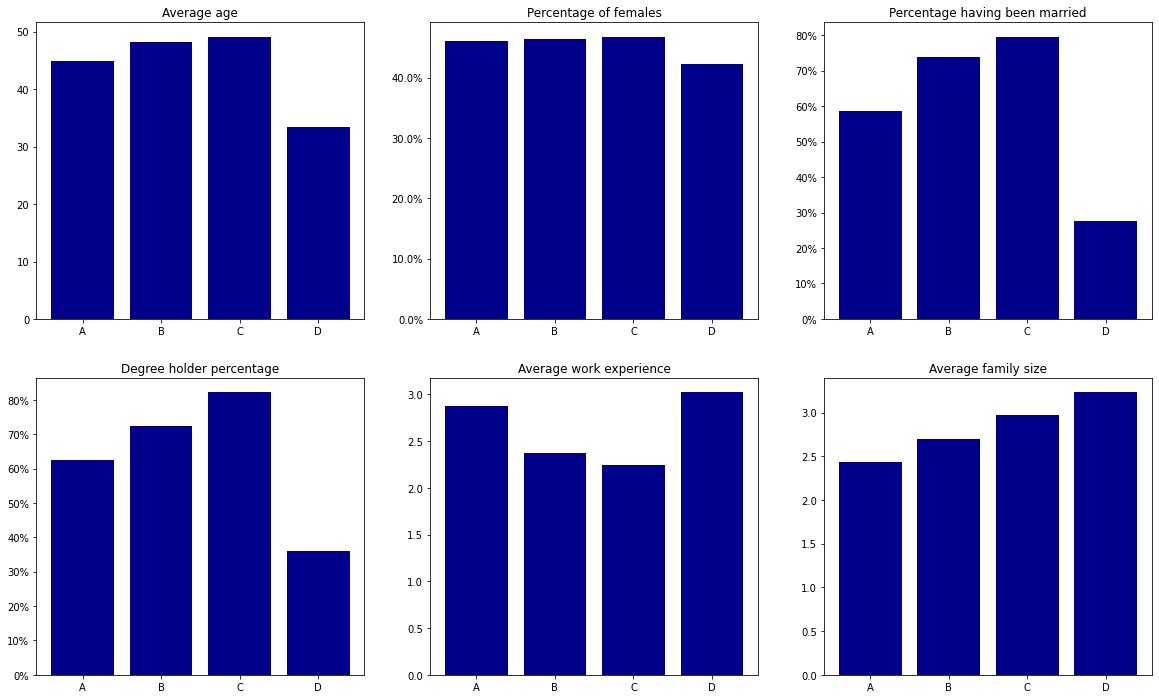

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

colors = ['darkblue'] * 4

for column_name, ax in zip(pivot_table_quanti.columns, axes.flatten()):
    ax.bar(x=pivot_table.index, height=pivot_table_quanti[column_name], color=colors)
    if column_name in ['Percentage of females', 'Percentage having been married', 'Degree holder percentage']:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_title(column_name);

In [14]:
pivot_table_quali

,Top three professions,Spending score frequency order
Segmentation,,
A,Artist - Entertainment - Engineer,Low - Average - High
B,Artist - Entertainment - Engineer,Low - Average - High
C,Artist - Executive - Entertainment,Average - Low - High
D,Healthcare - Entertainment - Doctor,Low - High - Average


In [15]:
(customers[customers['Segmentation'] == 'B']['Profession'].value_counts(normalize=True) * 100)

Artist           41.176471
Entertainment    12.037037
Engineer         10.294118
Executive         9.967320
Lawyer            8.605664
Doctor            7.788671
Healthcare        5.501089
Homemaker         2.995643
Marketing         1.633987
Name: Profession, dtype: float64

**NB:** Some additional analyses have been directly conducted in the `customer_segmentation_slides.ipynb`, which I used to generate the slides.

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Based on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

---

We are going to implement a **K-Means algorithm** in order to cluster customers based on available variables.

To do so, we first have to go through a few preprocessing steps, notably because of missing values.

In [16]:
# Displays the number of NaN values for each column
customers.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

**NB:** throughout the following preprocessing steps, we will make simplifying assumptions, which will always be stated as clearly as possible. These could certainly be questioned but their impact on the eventual clustering is likely to be limited and anyway, the goal was to run a first quick analysis. 

We first consider **numerical variables**, ie.:

- `Age`, which does not display any missing value;
- `Family_Size`, which displays 335 missing values;
- `Work_Experience`, which displays 829 missing values.

We are going to assume that NaN values for `Family_Size` comes down to the customer having no relative. We therefore impute the value 1. 

Besides, we assume that NaN values for `Work_Experience` comes down to the customer having no work experience. We therefore impute the value 0. 

In [17]:
# We drop IDs which will be useless here
data_preprocessed = customers.drop(columns='ID').copy()

# We impute the value 1 for family size
data_preprocessed['Family_Size'] = data_preprocessed['Family_Size'].fillna(1)

# We impute the value 0 for work experience
data_preprocessed['Work_Experience'] = data_preprocessed['Work_Experience'].fillna(0)

We now consider **binary categorical variables**, ie.:

- `Gender`, which does not display any missing value;
- `Ever_Married`, which displays 140 missing values;
- `Graduated`, which displays 78 missing values.

For both `Ever_Married` and `Graduated`, we are going to assume that a NaN value corresponds to the "No" case, ie. the customer has never been married and does not hold a degree. We therefore impute the value "No". 

Besides, for each of these three variables we implement a mapping for `str` values to 0 / 1 values.

In [18]:
# Mapping gender data to 0 or 1
data_preprocessed['Gender'] = data_preprocessed['Gender'].map({'Male': 0, 'Female': 1})

# Managing NaNs and mapping values for Ever_Married
data_preprocessed['Ever_Married'] = data_preprocessed['Ever_Married'].fillna('No').map({'No': 0, 'Yes': 1})

# Managing NaNs and mapping values for Graduated
data_preprocessed['Graduated'] = data_preprocessed['Graduated'].fillna('No').map({'No': 0, 'Yes': 1})

We now consider **multi-categorical variables**, ie.:

- `Spending_Score`, which does not display any missing value;
- `Profession`, which displays 124 missing values.

For `Profession`, we are simply going to add a possible category, `Unknown`, which we impute to NaNs. 

But the most important step is the encoding of these multi-categorical variables. The approach will differ between the two variables:

- `Spending_Score` will be considered as an ordered variable, simply mapped on a 0-1-2 numerical scale;
- `Profession` will be "one-hot encoded", ie. we will have one dummy variable for each possible value.

In [19]:
# First, we impute "Unknown" to NaNs in the Profession column
data_preprocessed['Profession'] = data_preprocessed['Profession'].fillna('Unknown')

In [20]:
# We map the Spending_Score variable as an ordered multi-categorical variable
data_preprocessed['Spending_Score'] = data_preprocessed['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})

In [21]:
# We run the encoding of the Profession variable
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe.fit(data_preprocessed[['Profession']])

ohe_output = pd.DataFrame(ohe.transform(data_preprocessed[['Profession']]), columns=ohe.categories_[0])

data_preprocessed = pd.concat([data_preprocessed, ohe_output], axis=1).drop(columns='Profession')

Let us have a look at the resulting dataset!

In [22]:
data_preprocessed.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Unknown
0,0,0,22,0,1.0,0,4.0,D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,38,1,0.0,1,3.0,A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,67,1,1.0,0,1.0,B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,67,1,0.0,2,2.0,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,40,1,0.0,2,6.0,A,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**NB:** we have not yet eliminated the `Segmentation` column but we will have to drop it before running the clustering.

We can verify that there are no missing values anymore.

In [23]:
data_preprocessed.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
Artist             0
Doctor             0
Engineer           0
Entertainment      0
Executive          0
Healthcare         0
Homemaker          0
Lawyer             0
Marketing          0
Unknown            0
dtype: int64

We are now ready to cluster customers based on preprocessed variables. 

Our first goal is to determine the right number of clusters. To do so, we want to find the right balance between the minimization of the **inertia** criterion of the K-Means algorithm (can be roughly defined as a quality-of-fit indicator) and still having a **limited number of clusters**, notably for easier interpretation.

We are thus going to run a clustering with various numbers of clusters and use the "elbow method" to determine the right one.

In [24]:
%%time

# This variable will store each K-Means' inertia criterion
inertias = []

for i in range(15):
    # We instantiate a K-Means algorithm with i+1 clusters
    kmeans = KMeans(n_clusters=i+1)
    
    # We fit the algorithm on data 
    kmeans.fit(data_preprocessed.drop(columns='Segmentation'))
    
    # And we fetch its inertia
    inertias.append(kmeans.inertia_)

CPU times: user 8.7 s, sys: 2.56 s, total: 11.3 s
Wall time: 3.16 s


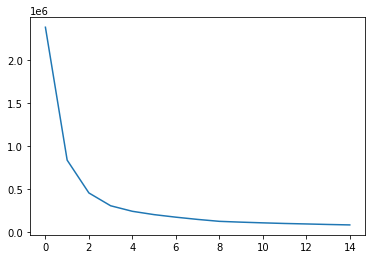

In [25]:
# We can now plot the inertias computed for various number of clusters
plt.plot(inertias)

And we see that the last visually significant drop in inertia occurs when moving from 2 to 3 clusters. 

We can therefore consider 3 as the right number of clusters to identify.

In [26]:
n_clusters = 3

In [27]:
# We can refit a K-Means algorithm with 3 clusters and add the new segmentation to our DataFrame
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(data_preprocessed.drop(columns='Segmentation'))
    
customers_new = customers.copy()
customers_new['New_Segmentation'] = kmeans.labels_
customers_new.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,New_Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,2
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0


**NB:** After some reflection, I re-tried the experiment while scaling numerical variables such as `Age`, `Work_Experience` and `Family_Size` and this result with 3 clusters does not seem robust to the operation (which seems natural to apply a distance-based clustering algorithm). The results are as follows:

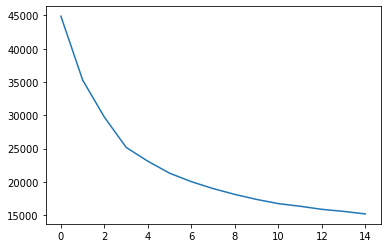

In [28]:
# We iterate over the list of numerical features and scale each of them
for numerical_feature in ['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']:
    scaler = StandardScaler()
    
    scaler.fit(data_preprocessed[[numerical_feature]])
    
    data_preprocessed[numerical_feature] = scaler.transform(data_preprocessed[[numerical_feature]])

inertias = []

for i in range(15):
    # We instantiate a K-Means algorithm with i+1 clusters
    kmeans = KMeans(n_clusters=i+1)
    
    # We fit the algorithm on data 
    kmeans.fit(data_preprocessed.drop(columns='Segmentation'))
    
    # And we fetch its inertia
    inertias.append(kmeans.inertia_)
    
plt.plot(inertias)

Unfortunately, I did not have time to dig deeper into the topic but the optimal number of clusters might in fact be higher than 3. 

**💾 Save your results**

Run the following cell to save your results.

In [29]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [30]:
# Load the data and display the first rows
url = 'https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv'

customers = pd.read_csv(url)

customers.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,is_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

We are going to implement a simple one-sided t-test with the following hypotheses:

- **Null hypothesis (H0)**: 

$$average\,\, age\,\, of\,\, customers\,\, from\,\, segment\,\, D \geq average\,\, age\,\, of\,\, all\,\, customers$$

- **Alternative hypothesis (H1)**: 

$$average\,\, age\,\, of\,\, customers\,\, from\,\, segment\,\, D < average\,\, age\,\, of\,\, all\,\, customers$$

If the p-value of the t-test is small (below 1 or 5% depending on the confidence level we aim for), we will be able to reject the null hypothesis for the alternative, ie. customers from segment D would then be considered as statistically younger than overall customers.

In [31]:
# Test
from scipy.stats import ttest_ind

ttest = ttest_ind(
    customers[customers['is_D'] == 1]['Age'], 
    customers['Age'], 
    alternative='less'
)

print('Is the null hypothesis rejected at the 95% confidence level?', 'Yes' if ttest.pvalue < 0.05 else 'No')
print('Is the null hypothesis rejected at the 99% confidence level?', 'Yes' if ttest.pvalue < 0.01 else 'No')

Is the null hypothesis rejected at the 95% confidence level? Yes
Is the null hypothesis rejected at the 99% confidence level? Yes


In [32]:
# We can print the p-value
ttest.pvalue

1.1835501911603531e-141

In [33]:
# p_value
p_value = ttest.pvalue

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

The **average odds ratio for a customer to be in the segment D** simply corresponds to the ratio of the number of individuals in group D to the number of individuals in segments A, B, or C. We therefore run the following computations:

In [34]:
# odds
odds = len(customers[customers['is_D'] == 1]) / len(customers[customers['is_D'] == 0])
print("Average odds for a customer to be in segment D:", round(odds, 4))

Average odds for a customer to be in segment D: 0.391


❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

To determine this multiplicative effect, we first need to run a logistic regression: we are going to pose a simple model, regressing the `is_D` binary outcome over `Age`, `Ever_Married` and `Graduated`. This requires to slightly modify the last two columns.  

In [35]:
# We store the outcome and the features of interest in a new DataFrame
regression_data = customers[['Age', 'Ever_Married', 'Graduated', 'is_D']].copy()

# We replace missing values in the Ever_Married and Graduated columns with the same assumptions as above
regression_data['Ever_Married'] = regression_data['Ever_Married'].fillna('No')
regression_data['Graduated'] = regression_data['Graduated'].fillna('No')

# We map binary explanatory variables to 0 or 1 values 
regression_data['Ever_Married'] = regression_data['Ever_Married'].map({'Yes': 1, 'No': 0}) 
regression_data['Graduated'] = regression_data['Graduated'].map({'Yes': 1, 'No': 0}) 

We will want to examine the effect of an increase of `Age` by 1 for a married and graduated customer. So, we need to interact binary variables with `Age`. 

In [36]:
# We interact binary variables with Age
regression_data['AgexMarried'] = regression_data['Ever_Married'] * regression_data['Age']
regression_data['AgexGraduated'] = regression_data['Graduated'] * regression_data['Age']

Let us have a look at the result of this minimal preprocessing. 

In [37]:
regression_data.head()

,Age,Ever_Married,Graduated,is_D,AgexMarried,AgexGraduated
0,22,0,0,1,0,0
1,38,1,1,0,38,38
2,67,1,1,0,67,67
3,67,1,1,0,67,67
4,40,1,1,0,40,40


We can now fit the logistic regression of the binary outcome over explanatory variables. 

In [38]:
model = smf.logit(
    formula='is_D ~ Age + C(Ever_Married) + C(Graduated) + AgexMarried + AgexGraduated', 
    data=regression_data
)

results = model.fit()

Optimization terminated successfully.
         Current function value: 0.456495
         Iterations 7


Let us have a look at the summary of the logistic regression:

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_D   No. Observations:                 8068
Model:                          Logit   Df Residuals:                     8062
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:                  0.2315
Time:                        17:41:33   Log-Likelihood:                -3683.0
converged:                       True   LL-Null:                       -4792.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.7443      0.153     17.989      0.000       2.445       3.043
C(Ever_Married)[T.1]    -3.3361      0.212    -15.702      0.000      -3.753      -2.920
C(Graduated)[T.1]       -0.6929      0.174     -3.972      0.000      -1.035      -0.351
Age                     -0.0722      0.005    -15.034      0.000      -0.082      -0.063
AgexMarried              0.0599      0.006     10.821      0.000       0.049       0.071
AgexGraduated           -0.0087      0.004     -2.094      0.036      -0.017      -0.001
========================================================================================
"""

We can test whether regressors related to the age of the customer are jointly significant. 

In [40]:
hypotheses = '(Age = 0), (AgexMarried = 0), (AgexGraduated = 0)'
f_test = results.f_test(hypotheses)
float(f_test.pvalue)

3.970762798615161e-61

And the p-value is very low, indicating that we can reject the null hypothesis and assert that the coefficients are jointly statistically significant. 

We can now compute by how much an increase by 1 of age multiplies the odds of belonging to the D segment for a married and graduated individual.

In [41]:
# odds_variation
odds_variation = np.exp(results.params['Age'] + results.params['AgexMarried'] + results.params['AgexGraduated'])

odds_variation

0.9792257010676886

Hence, an increase in age for a married and graduated individual reduces the odds of being in the group D.

####  💾 Save your results

Run the following cell to save your results.

In [42]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**